# Testing Matplotlib - Part IV:  3D Surfaces Animation 


Stephane D., November 2022 

version v.2

## Objectives


<span style="color:#4169E1"> Testing Matplotlib ANIMATION capabilities. 

<span style="color:#4169E1"> Animation of 3D Surfaces:<br> 
    
    * Transition Helicoid-Catenoid
    * Figure8 toroid
    * Elliptic Torus
    * Tanglecube 


<span style="color:#4169E1"> Note: the creation of each 3D surface animation can take several minutes 8-10 minutes, depending on the resolution of "mehsgrid". Generally 100x100 points.   

## Import Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import axes3d
# Import math Library
import math
from matplotlib  import animation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import  mpl_toolkits.mplot3d 
from skimage import measure
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [50]:
from time import time

In [5]:
#--------------------------------------------
# Notebook wide presentation
#--------------------------------------------
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

#-------  For centering figures 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### Transition Helicoid-Catenoid

<span style="color:#4169E1">  The transition helicoid - catenoid depends on parameter/angle "theta". By properly varying this parameter, we create a set of figures that will be used for the animation.  <br>
An example of this transition can be seen on Wikipedia, in section "Helicoid transformation": https://en.wikipedia.org/wiki/Catenoid      
In other 3D animations, after plotting the figure, axis will be rotated, which is not the case here.  

101 101
End of run
Execution time:    400.93  seconds


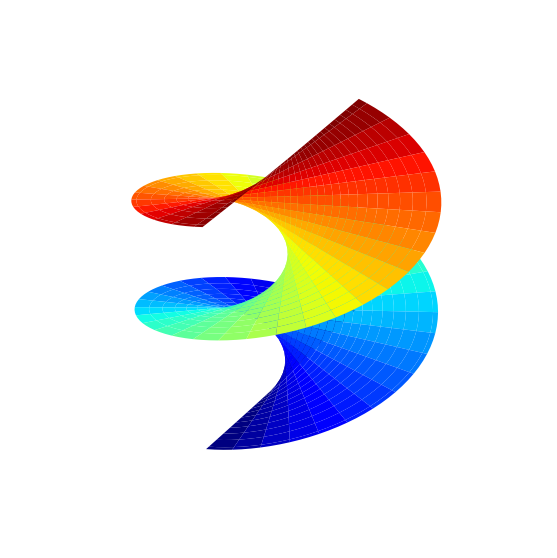

In [62]:
start_time = time()
#--------------------------------------------------------
t=np.arange(360)
resol=100
#------------   [-pi, pi[ -------------------------------  
#limt= np.pi
#uu=np.arange(-limt, limt, (2*limt+2)/resol, dtype=float)
limt= np.pi
uu=np.arange(0, 2*limt+limt/resol, 2*limt/resol, dtype=float)
#uu=np.arange(0, 2*limt, 2*limt/resol, dtype=float)
#-----------    v in R   -inf, +inf
infini= 1.5
vv=np.arange(-infini, infini+infini/resol, 2*infini/resol , dtype=float)
u,v = np.meshgrid(uu, vv)

x=np.zeros((len(u),len(v),len(t)))
y=np.zeros((len(u),len(v),len(t)))
z=np.zeros((len(u),len(v),len(t)))

for t in range(len(t)) :
    theta= t*2*np.pi/360
    x[:,:,t] = np.cos(theta)*np.sinh(v)*np.sin(u) + np.sin(theta)*np.cosh(v)*np.cos(u)
    y[:,:,t] = -np.cos(theta)*np.sinh(v)*np.cos(u) + np.sin(theta)*np.cosh(v)*np.sin(u)
    z[:,:,t] = u*np.cos(theta) + v*np.sin(theta)


    
norm = plt.Normalize(z[:,:,0].min(), z[:,:,0].max())
colors = cm.jet(norm(z[:,:,0]))
rcount, ccount, _ = colors.shape
    
# init_func() is called at the beginning of the animation
def init_func():
    ax.clear()
    ax.set_axis_off()
    
def update_plot(t):   #update_plot() is called between frames
    ax.clear()
    ax.set_axis_off()
    #ax.plot(x[0,:], yt[i,:], color='k')
    #ax.plot_surface(x[:,:,t], y[:,:,t], z[:,:,t], rcount=rcount, ccount=ccount, facecolors=colors, linewidth=0, shade=False)   
    ax.plot_surface(x[:,:,t], y[:,:,t], z[:,:,t], cmap='jet', edgecolor='none', alpha=1)
#========================================
# Create animation
# Create the figure and axes to animate
#========================================
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')


anim = FuncAnimation(fig, update_plot,
                         frames=360, 
                         interval=2, 
                         #blit=True,
                         init_func=init_func)

f = r'Helicoid_Catenoid_v3.gif'
writergif = animation.PillowWriter(fps=30) 
anim.save(f, writer=writergif)

print('End of run')
end_time = time()
tim=end_time - start_time
#print(f"Execution time: {tim:.2}  seconds") 
print("Execution time:  %8.2f"% (tim)," seconds")

### Figure8 toroid

<span style="color:#4169E1"> The figure8 Toroid is presented in Part I: 3D surfaces. <br>
We plot the 3D surface and rotate the axis.  

End of run
Execution time:   1666.15  seconds


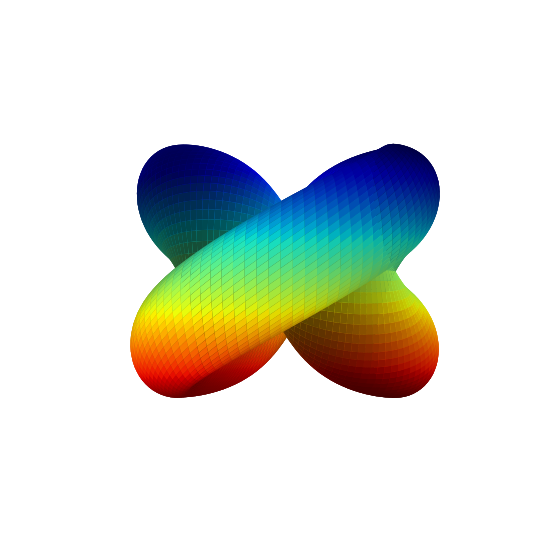

In [63]:
start_time = time()
resol=100
c=1.5
#c=0.5
#c=0.15
#-π <= u,v <= π
u,v =np.meshgrid(np.linspace(start=-np.pi,stop= np.pi,num=resol), np.linspace(start=-np.pi, stop= np.pi, num=resol));


x = np.cos(u)*(c + np.sin(v)*np.cos(u) - np.sin(2*v)*np.sin(u) / 2)
y = np.sin(u)*(c + np.sin(v)*np.cos(u) - np.sin(2*v)*np.sin(u) / 2)
z = np.sin(u)*np.sin(v) + np.cos(u)*np.sin(2*v) / 2

# Normalize to [0,1]
norm = plt.Normalize(z.min(), z.max())
colors = cm.jet(norm(z))
rcount, ccount, _ = colors.shape

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
#ax.grid()

def init():
    ax.set_axis_off()
    #ax.scatter(xx, yy, zz, marker='o', s=20, c="goldenrod", alpha=0.6)
    #ax.plot_surface(X, Y, Z,rcount=rcount, ccount=ccount, facecolors=colors, alpha=0.5, antialiased=True, shade=False)
    surf = ax.plot_surface(x, y, z, rcount=rcount, ccount=ccount, facecolors=colors, linewidth=0, shade=True)
    #surf.set_facecolor((0,0,0,0))
    return fig,

def animate(i):
    #print(i)
    ax.view_init(elev=2*i-180, azim=2*i)
    #ax.view_init(elev=i-180, azim=i)
    return fig,


# Animate
#anim = animation.FuncAnimation(fig, animate, init_func=init,
                              # frames=360, interval=20, blit=True)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=180, interval=20, blit=True)
                               # frames=360, interval=20, blit=True)


f = r"Figure8_toroid_v4.gif" 
writergif = animation.PillowWriter(fps=30) 
anim.save(f, writer=writergif)
print('End of run')
end_time = time()
tim=end_time - start_time
#print(f"Execution time: {tim:.2}  seconds") 
print("Execution time:  %8.2f"% (tim)," seconds")

### Elliptic Torus

<span style="color:#4169E1"> The Elliptic torus is presented in Part I. For a better effect we will tilt the 3D surface with a set of rotations. Then we will rotate axis for creating the animation.<br>
We first define a function with the 3 rotations in 3D. 

In [22]:
def rotation_xyz(X, Y, Z, theta, phi, psi):
    '''
    Generates new coordinates XX,YY,ZZ after rotation: Rxyz=Rx(theta)*Ry(phi)*Rz(psi).
    Can be fed any coordinate arrays: X,Y,Z = meshgrid(x,y,z) for rotating 3D surfaces.    
    '''
    Rx= np.array([[1,             0,              0],
                  [0, np.cos(theta), -np.sin(theta)], 
                  [0, np.sin(theta), np.cos(theta)]])
    Ry= np.array([[np.cos(phi),  0 ,    np.sin(phi)],
                  [0,            1,               0], 
                  [-np.sin(phi), 0,    np.cos(phi)]])
    Rz= np.array([[np.cos(psi), -np.sin(psi),     0], 
                  [np.sin(psi),  np.cos(psi),     0], 
                  [0,                0,           1]])
    
    Rxyz=np.dot(Rx,np.dot(Ry,Rz))
    
    XX= Rxyz[0][0]*X + Rxyz[0][1]*Y + Rxyz[0][2]*Z
    YY= Rxyz[1][0]*X + Rxyz[1][1]*Y + Rxyz[1][2]*Z
    ZZ= Rxyz[2][0]*X + Rxyz[2][1]*Y + Rxyz[2][2]*Z

    return XX,YY,ZZ

<span style="color:#4169E1"> We build the tilted 3D surface. 

In [107]:

resol=80
c=1
c=0.5
#c=0.15
#-π <= u,v <= π
u,v =np.meshgrid(np.linspace(start=-np.pi,stop= np.pi,num=resol), np.linspace(start=-np.pi, stop= np.pi, num=resol));

X = (c + np.cos(v))*np.cos(u)
Y = (c + np.cos(v))*np.sin(u)
Z = np.sin(v) + np.cos(v)  

#--- Tilting angles theta, phi, psi 
theta=-2*np.pi/3
phi=-np.pi/3
psi=np.pi/4
#psi=0
XX, YY, ZZ = rotation_xyz(X,Y,Z,theta,phi,psi)



<span style="color:#4169E1"> We plot the initial 3D surface and its tilted version (wireframes).  

0.18941105192301746 1.9349030676381551
 


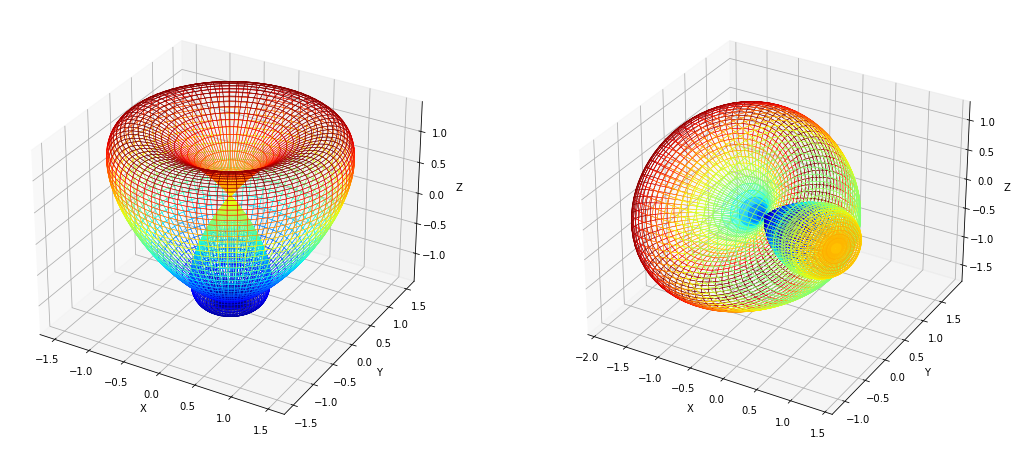

In [108]:

norm = plt.Normalize(Z.min(), Z.max())
colors = cm.jet(norm(Z))
rcount, ccount, _ = colors.shape


fig=plt.figure(figsize=(18,8))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, rcount=rcount, ccount=ccount, facecolors=colors, linewidth=0.5, shade=False)
surf.set_facecolor((0,0,0,0))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


#----  NORMALIZATION with radius  
RO=  np.sqrt(XX**2 + YY**2 + ZZ**2)
print(RO.min(), RO.max())
#normRO = plt.Normalize(0.5*RO.min(), RO.max())
norm = plt.Normalize(0.1, RO.max())
colors = cm.jet(norm(RO))
rcount, ccount, _ = colors.shape

ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(XX, YY, ZZ, rcount=rcount, ccount=ccount, facecolors=colors, linewidth=0.5, shade=False)
surf.set_facecolor((0,0,0,0))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

print(' ')

<span style="color:#4169E1"> We create an animation by plotting the tilted 3D surface and rotating axis.  

End of run


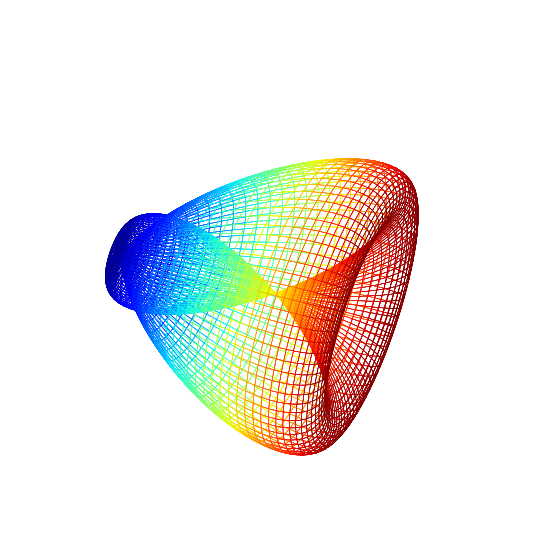

In [109]:
start_time = time()
#------------------------------------------------------------------------------------
# Normalize to [-sqrt(2),sqrt(2)] based on z  
norm = plt.Normalize(Z.min(), Z.max())
colors = cm.jet(norm(Z))
rcount, ccount, _ = colors.shape
#-------------------------------------------------------------------------------------

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
#ax.grid()

def init():
    ax.set_axis_off()
    #ax.scatter(xx, yy, zz, marker='o', s=20, c="goldenrod", alpha=0.6)
    #ax.plot_surface(X, Y, Z,rcount=rcount, ccount=ccount, facecolors=colors, alpha=0.5, antialiased=True, shade=False)
    surf=ax.plot_surface(XX, YY, ZZ, rcount=rcount, ccount=ccount, facecolors=colors, linewidth=0.5, shade=False)
    surf.set_facecolor((0,0,0,0))
    return fig,

def animate2(i):
    #print(i)
    #ax.view_init(elev=2*i-180, azim=2*i,roll=2*i)
    ax.view_init(elev=2*i-90, azim=45-2*i)
    #ax.view_init(elev=i-180, azim=i)
    return fig,



# Animate
anim = animation.FuncAnimation(fig, animate2, init_func=init,
                               frames=180, interval=20, blit=True)
                               # frames=360, interval=20, blit=True)
# Save 
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])



f = r"Elliptic Torus_v3.gif" 
writergif = animation.PillowWriter(fps=30) 
anim.save(f, writer=writergif)
print('End of run')
end_time = time()
tim=end_time - start_time
#print(f"Execution time: {tim:.2}  seconds") 
print("Execution time:  %8.2f"% (tim)," seconds")

### Tanglecube 

<span style="color:#4169E1"> The tanglecube is presented in Part II: Implicit 3D surface. <br> We plot the 3D surface and rotate the axis. 

In [18]:
def tanglecube(x,y,z):
    return x**4+y**4+z**4 -5*(x**2+y**2+z**2)+11.8

In [19]:
xl = np.linspace(-3, 3,  50)
X, Y, Z = np.meshgrid(xl, xl, xl)
F = tanglecube(X, Y, Z)

In [20]:
verts, faces, normals, values = measure.marching_cubes(F, 0) #, spacing=[np.diff(xl)[0]]*3)
#verts -= 3

End of run


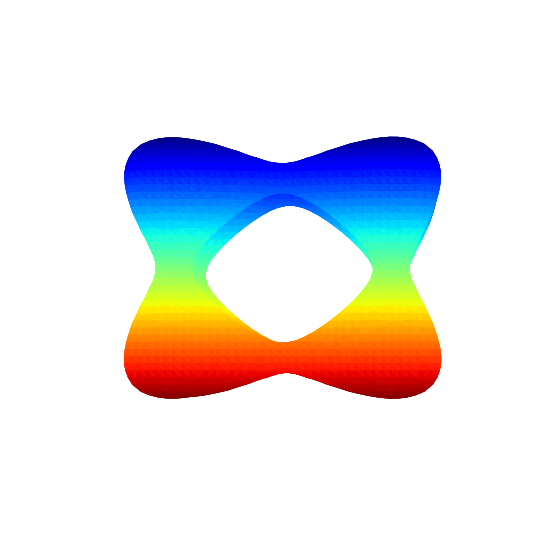

In [21]:
start_time = time()
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
#ax.grid()

def init():
    ax.set_axis_off()
    ax.plot_trisurf(verts[:, 0], verts[:, 1], faces, verts[:, 2], cmap='jet', lw=0)
    return fig,

def animate(i):
    #print(i)
    ax.view_init(elev=2*i-180, azim=2*i)
    return fig,


# Animate

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=180, interval=20, blit=True)
                               # frames=360, interval=20, blit=True)

f = r"TangleCube_v3.gif" 
writergif = animation.PillowWriter(fps=30) 
anim.save(f, writer=writergif)
print('End of run')
end_time = time()
tim=end_time - start_time
#print(f"Execution time: {tim:.2}  seconds") 
print("Execution time:  %8.2f"% (tim)," seconds")

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description                     |
| ----------------- | ------- | --------------- | -------------------------------------- |
| 2022-12-02        | 0.1     |   Stephane D.   | Initial version - rotating axis        |
| 2022-12-06        | 0.2     |   Stephane D.   | Adding transition Helicoid-Catenoid    |